In [1]:
import gsdio
import utils
import numpy as np

In [2]:
gsdio.extract_positions('1.gsd', '1.txt')

In [3]:
[x,box] = utils.read_configuration('1.txt', frame=1)

In [4]:
x.shape

(1, 8000, 3)

In [5]:
cell,_ = utils.cell_list(x,box,box/300)

In [6]:
cell

array([[140, 141, 197],
       [204, 221, 184],
       [208, 141, 185],
       ...,
       [130,  78, 214],
       [235, 122, 136],
       [ 94, 160, 137]])

In [7]:
cell[:,0]

array([140, 204, 208, ..., 130, 235,  94])

In [8]:
import numpy as np

cells = np.array([[0, 0, 0],
                  [1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])  # 0-based
N_grid = (3, 3, 3)

lincell = np.ravel_multi_index((cells[:, 0], cells[:, 1], cells[:, 2]), dims=N_grid, order='F')
print(lincell)


[0 1 3 9]


In [9]:
import scipy.io

mat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/matlab.mat')


In [10]:
x_matlab = mat['x']
x_matlab = np.transpose(x_matlab, (2, 0, 1))  # → (101, 8000, 3)


In [11]:
x_matlab.shape

(101, 8000, 3)

In [12]:
print("Position max diff:", np.max(np.abs(x - x_matlab)))

Position max diff: 149.62881


In [13]:
import structurefactor
[qx,qy,qz] = structurefactor.compute_q3_grid(x,box,300)

In [14]:
qx.shape

(300, 300, 300)

## q3grid verification

In [15]:
q3xmat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/q3x.mat')['q_3_x']
q3ymat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/q3y.mat')['q_3_y']
q3zmat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/q3z.mat')['q_3_z']


In [16]:
q3xmat.shape

(300, 300, 300)

In [17]:
print("max diff:", np.max(np.abs(qx - q3xmat)))
print("max diff:", np.max(np.abs(qy - q3ymat)))
print("max diff:", np.max(np.abs(qz - q3zmat)))

max diff: 0.0
max diff: 0.0
max diff: 0.0


## S3 Verification

In [18]:
import structurefactor as s

In [19]:
s3,_, xgrid, xgrid_re, lincell, bins = s.compute_s_3d(x,box,300)

8000


In [20]:
xgrid = np.zeros((2,2,2), order='F')
xgrid[0,0,0] = 1
print(np.fft.fftn(xgrid))


[[[1.+0.j 1.+0.j]
  [1.+0.j 1.+0.j]]

 [[1.+0.j 1.+0.j]
  [1.+0.j 1.+0.j]]]


In [21]:
print("Is xgrid Fortran-contiguous?", xgrid.flags['F_CONTIGUOUS'])
print("Is xgrid C-contiguous?", xgrid.flags['C_CONTIGUOUS'])


Is xgrid Fortran-contiguous? True
Is xgrid C-contiguous? False


In [22]:
from numpy.fft import fftn, fftshift
print("Sample xgrid values:", xgrid_re.flat[:10])
print("Sample FFT:", fftn(xgrid_re).flat[:10])
fftnpy = fftn(xgrid_re)
fftshifted = fftshift(fftnpy)
s3_manual = np.abs(fftshifted)**2/8000


Sample xgrid values: [0 0 0 0 0 0 0 0 0 0]
Sample FFT: [8000.          +0.j         -122.46904295  -3.85831935j
 -327.86708405 -37.05619302j -454.36074458 -89.66572307j
 -470.59186116 -76.16196744j -105.19009666-422.94349444j
  -22.41128472+317.77133373j  265.82903908 -61.34760157j
   45.9653934 +153.36868575j -249.8675408  +60.6479133j ]


In [23]:
fftnmat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/fftnmat.mat')['fftnresult']
fftshiftmat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/fftshiftresult.mat')['fftshiftresult']
s3mat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/s3mat.mat')['s3']

In [24]:
scale_ratio = np.max(np.abs(s3_manual)) / np.max(np.abs(s3mat))
print("Scale difference:", scale_ratio)


Scale difference: 1.0


In [25]:
s3mat.shape

(300, 300, 300)

In [26]:
print(np.max(np.abs(s3 - s3mat)))

8.526512829121202e-14


In [27]:
lincell

array([17772440, 16626504, 16692508, ..., 19283530, 12276835, 12378094])

In [28]:
print("Sum xgrid:", np.sum(xgrid))  # should be N
print("Max of xgrid:", np.max(xgrid))
print("Nonzero count:", np.count_nonzero(xgrid))


Sum xgrid: 1.0
Max of xgrid: 1.0
Nonzero count: 1


In [29]:
xgridmat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/xgridmat.mat')['xgrid']

In [30]:
s3.shape

(300, 300, 300)

In [31]:
s3mat.shape

(300, 300, 300)

In [32]:
print(np.max(np.abs(s3 - s3mat)))

8.526512829121202e-14


In [33]:
q1mat = scipy.io.loadmat('/Users/hanson/Documents/UW/Research - Sherman Pozzo Lab/Simulation/Structure Factor/q1mat')['q_1_bin']

In [34]:
q1bin, s1 = s.compute_s_1d(x,box,300)

8000
0.041987532865014866


In [35]:
q1bin[0:10]

array([0.        , 0.04198753, 0.08397507, 0.1259626 , 0.16795013,
       0.20993766, 0.2519252 , 0.29391273, 0.33590026, 0.3778878 ])

In [36]:
s1

array([8.00000000e+03, 2.58811523e+00, 8.61865247e+00, 9.98720680e+00,
       1.22103738e+01, 1.32827608e+01, 1.30929600e+01, 1.21145266e+01,
       1.37825182e+01, 1.21787085e+01, 1.29127994e+01, 1.14866741e+01,
       1.10949041e+01, 9.90325580e+00, 9.04631465e+00, 7.94546176e+00,
       7.37315306e+00, 6.32267407e+00, 5.49591654e+00, 4.85298508e+00,
       4.30289952e+00, 3.64634506e+00, 3.05466660e+00, 2.69497858e+00,
       2.35147106e+00, 2.03542267e+00, 1.69253231e+00, 1.45265787e+00,
       1.23435606e+00, 1.03921863e+00, 9.04871027e-01, 7.38222677e-01,
       6.49182205e-01, 5.63663705e-01, 4.93052197e-01, 4.37720906e-01,
       3.93017978e-01, 3.62829444e-01, 3.43346691e-01, 3.25900309e-01,
       3.17348620e-01, 3.04721097e-01, 3.02246274e-01, 3.02023443e-01,
       3.00505199e-01, 3.03039083e-01, 3.05179485e-01, 3.02780902e-01,
       3.05658582e-01, 3.09093761e-01, 3.09000121e-01, 3.17679294e-01,
       3.14580252e-01, 3.19656316e-01, 3.20541645e-01, 3.23479026e-01,
      

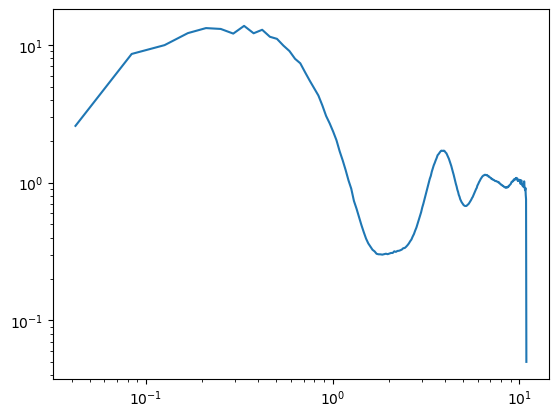

In [39]:
import matplotlib.pyplot as plt
plt.loglog(q1bin[1:261],s1[1:261])